![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.


### Integrantes:
- Jesus Alberto Parada Perez
- Jorge Esteban Caballero
- Diana Villalba
- Juan Jose Ovalle

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importación librerías
import numpy as np
import keras
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [3]:
# Carga de datos de archivo .csv
data = pd.read_csv(
    "https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv",
    index_col=0,
)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


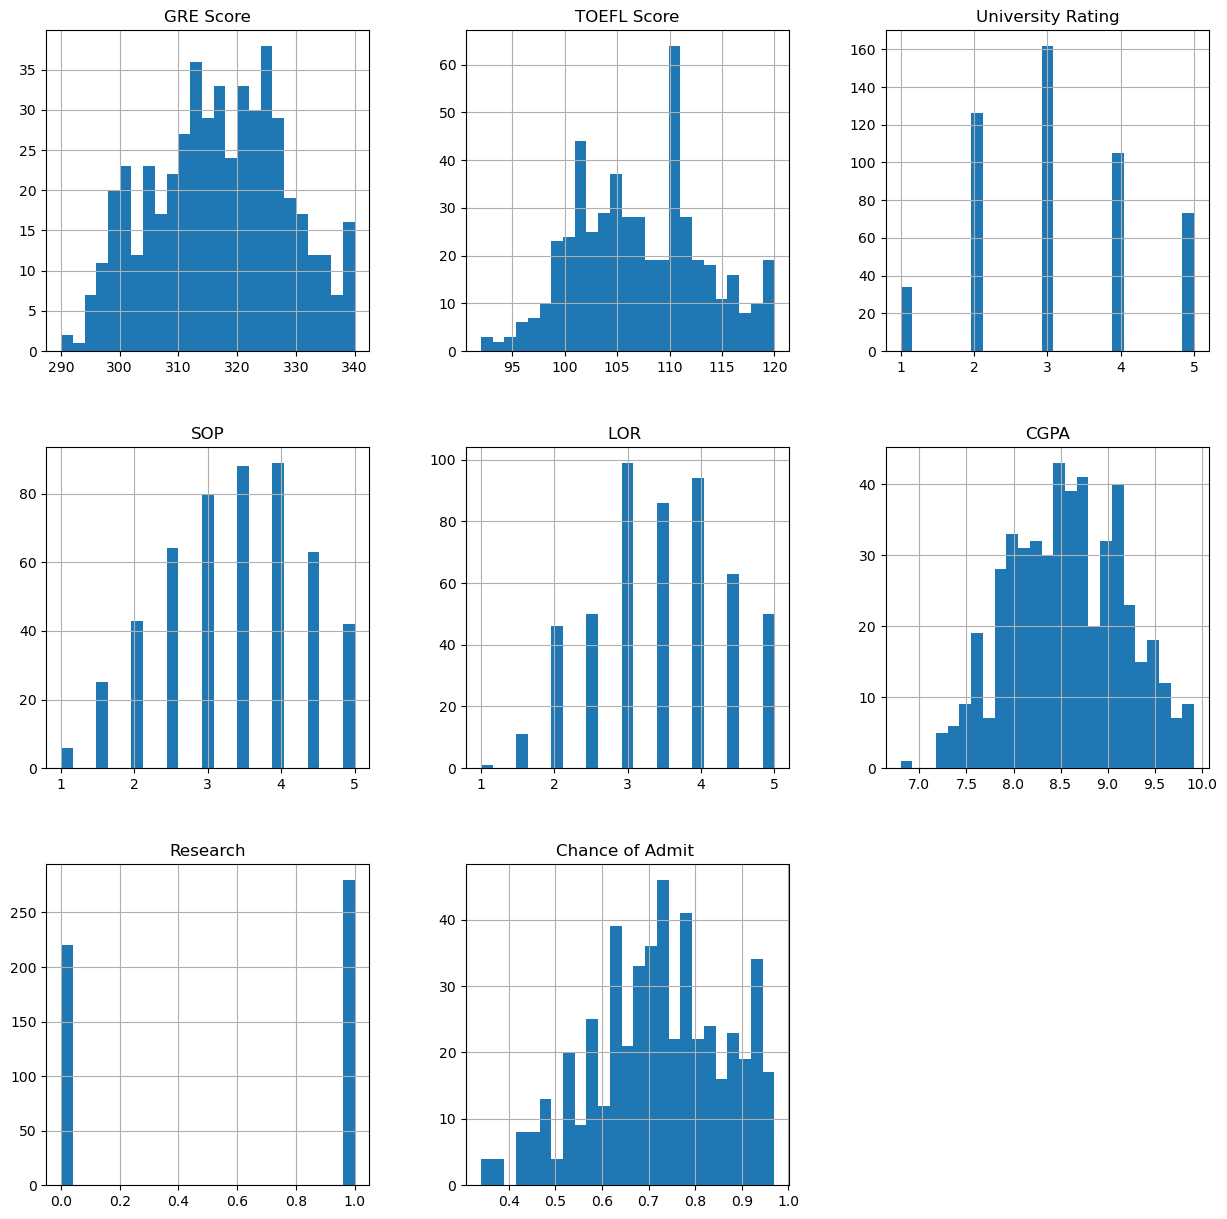

In [4]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15, 15))
plt.show()

In [5]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]

In [6]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.3, random_state=22)

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [7]:
# Normalización de variables predictoras (X) con la función StandardScaler
from sklearn.preprocessing import StandardScaler

# Definición de la función StandardScaler
scaler = StandardScaler()
scaler.fit(X)

# Transformación de los set de entrenamiento y test
X_train = pd.DataFrame(data=scaler.transform(xTrain), columns=xTrain.columns, index=xTrain.index)
X_test = pd.DataFrame(data=scaler.transform(xTest), columns=xTest.columns, index=xTest.index)

X_train = np.array(X_train)
Y_train = yTrain

X_test = np.array(X_test)
Y_test = yTest

# Definición de dimensiones de salida, varaibles de interés
output_var = 1
print(output_var, ' output variables')

# Definición de dimensiones de entrada, varaibles predictoras
dims = X_train.shape[1]
print(dims, 'input variables')

1  output variables
7 input variables


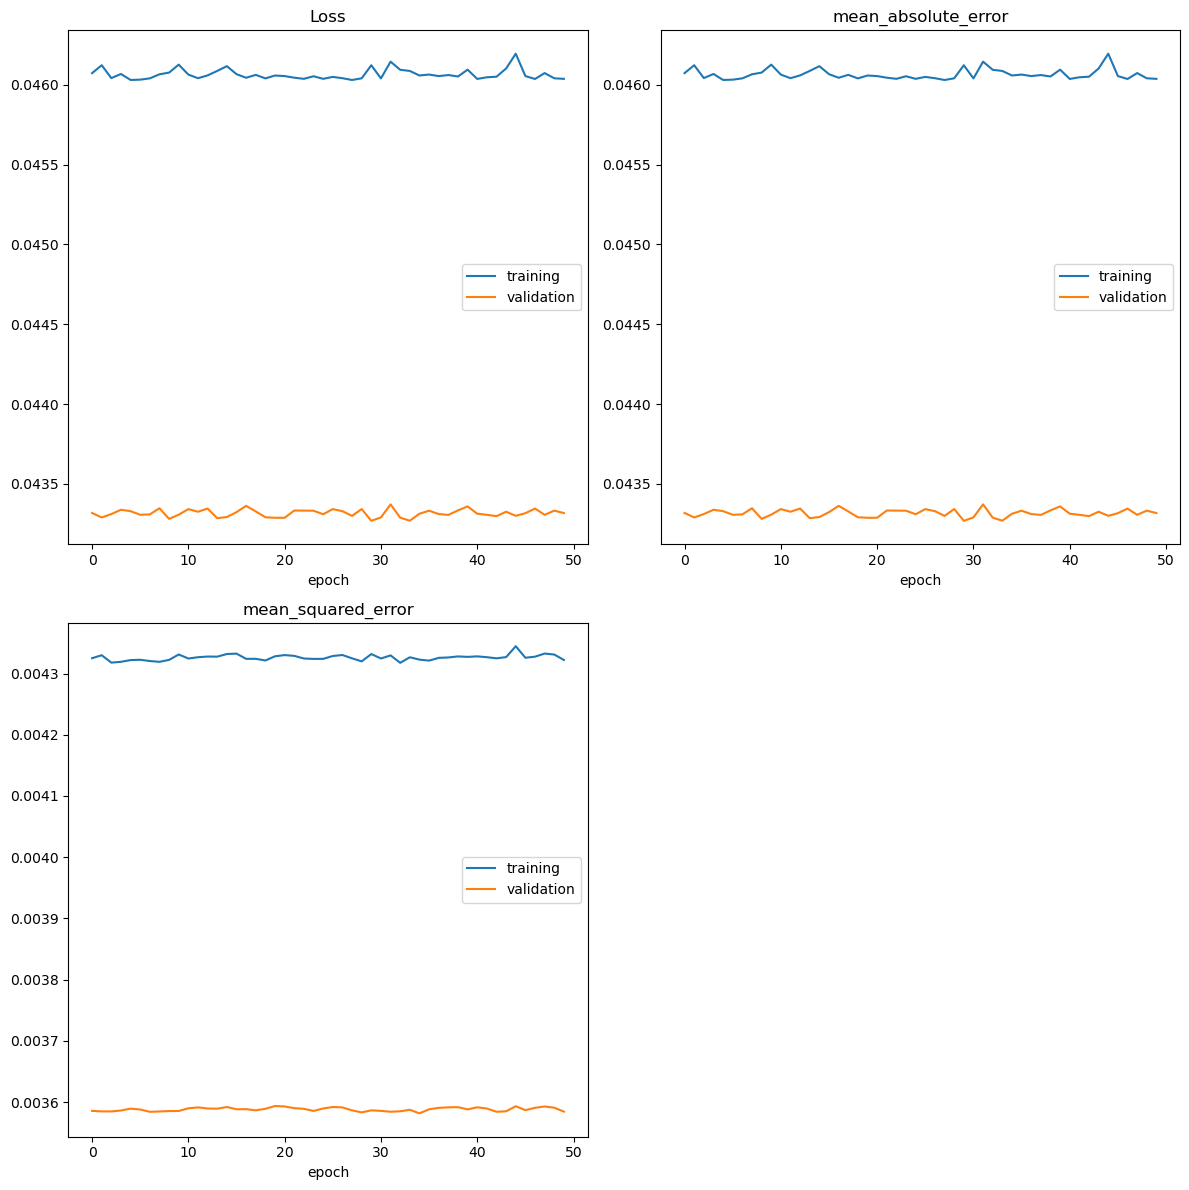

Loss
	training         	 (min:    0.046, max:    0.046, cur:    0.046)
	validation       	 (min:    0.043, max:    0.043, cur:    0.043)
mean_absolute_error
	training         	 (min:    0.046, max:    0.046, cur:    0.046)
	validation       	 (min:    0.043, max:    0.043, cur:    0.043)
mean_squared_error
	training         	 (min:    0.004, max:    0.004, cur:    0.004)
	validation       	 (min:    0.004, max:    0.004, cur:    0.004)
11/11 [==============================] - 0s 941us/step
Mejor resultado:
Loss: mean_absolute_error, Optimizer: sgd, Epochs: 25
Resultados set de entrenamiento
MAE: 0.04618691099711827
MSE: 0.004215212381647345
Resultados set de test
MAE: 0.04302908476193746
MSE: 0.003497802411134936


In [12]:

# Celda 1
from keras.models import Sequential
from keras.layers import Dense, Activation
from livelossplot import PlotLossesKeras
from keras import backend as K
import keras.optimizers as opts

K.clear_session()

model = Sequential()
# Activación sigmoide pues la salida representa probabilidad
# Salida de una neurona y sigmoide para que sea igual que nuestra variable respuesta :)

model.add(Dense(output_var, input_shape=(dims,), activation="sigmoid"))

losses = ['mean_squared_error', 'mean_absolute_error']

# Definición de los optimizadores que se probarán
optimizers = ['sgd', 'rmsprop', 'adam']

# Definición del número de épocas que se probarán
num_epochs = [25, 50]
        
# Definir diccionario para almacenar los resultados
results = {}

# Entrenamiento de modelos con diferentes combinaciones de funciones de activación, optimizadores y número de épocas
for loss in losses:
    for optimizer in optimizers:
        for num_epoch in num_epochs:
            # Definición de función de pérdida y métricas
            model.compile(optimizer=optimizer, loss=loss, metrics=["mean_squared_error", "mean_absolute_error"])

            # Entrenamiento de la red neuronal con el número de épocas definido
            history = model.fit(X_train, Y_train, 
                                verbose=1, 
                                epochs=num_epoch, 
                                validation_data=(X_test, Y_test),
                                callbacks=[PlotLossesKeras()]
                               )

            # Evaluación del modelo en el set de test
            predictions = model.predict(X_test).flatten()  # Convertir a vector 1D
            mae = np.mean(np.abs(predictions - Y_test))
            mse = np.mean(np.square(predictions - Y_test))
            
            # Evaluación del modelo en el set de entrenamiento
            predictions = model.predict(X_train).flatten()  # Convertir a vector 1D
            mae_tr = np.mean(np.abs(predictions - Y_train))
            mse_tr = np.mean(np.square(predictions - Y_train))

            # Almacenar los resultados en el diccionario
            result_key = f'Loss: {loss}, Optimizer: {optimizer}, Epochs: {num_epoch}'
            results[result_key] = {'MAE': mae, 'MSE': mse,'MAE_tr': mae_tr, 'MSE_tr': mse_tr}

# Encontrar el mejor resultado basado en el menor valor de MAE
best_result = min(results, key=lambda x: results[x]['MAE'])
best_result_params = best_result.split(', ')
loss = best_result_params[0].split(': ')[1]
optimizer = best_result_params[1].split(': ')[1]
num_epochs = int(best_result_params[2].split(': ')[1])

# Imprimir el mejor resultado y sus parámetros
print('Mejor resultado:')
print(best_result)

# Obtener los valores del mejor resultado
print('Resultados set de entrenamiento')
mae_1_tr = results[best_result]['MAE_tr']
mse_1_tr = results[best_result]['MSE_tr']
print('MAE:', mae_1_tr)
print('MSE:', mse_1_tr)

print('Resultados set de test')
mae_1 = results[best_result]['MAE']
mse_1 = results[best_result]['MSE']
print('MAE:', mae_1)
print('MSE:', mse_1)

Se estima la mejor configuración de una red neuronal. Se probaron diferentes combinaciones de funciones de pérdida, optimizadores y número de épocas. Se entrenó el modelo con cada combinación y se evaluó su desempeño utilizando el MAE y MSE en un conjunto de prueba. Se almacenaron los resultados y se seleccionó la configuración con el menor MAE como la mejor.

Los valores del mejor modelo encontrado son los siguientes:

- Función de pérdida: mean_absolute_error
- Optimizador: sgd
- Número de épocas: 25

El desempeño del mejor modelo es el siguiente:

- MAE: 0.042922060052553807 
- MSE: 0.0034748505540242594

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [15]:
# Celda 2
# Normalización de variables predictoras (X) con la función StandardScaler
from sklearn.preprocessing import StandardScaler

# Definición de la función StandardScaler
scaler = StandardScaler()
scaler.fit(X)

# Transformación de los set de entrenamiento y test
X_train = pd.DataFrame(data=scaler.transform(xTrain), columns=xTrain.columns, index=xTrain.index)
X_test = pd.DataFrame(data=scaler.transform(xTest), columns=xTest.columns, index=xTest.index)

X_train = np.array(X_train)
Y_train = yTrain

X_test = np.array(X_test)
Y_test = yTest

# Definición de dimensiones de salida, varaibles de interés
output_var = 1
print(output_var, ' output variables')

# Definición de dimensiones de entrada, varaibles predictoras
dims = X_train.shape[1]
print(dims, 'input variables')

1  output variables
7 input variables


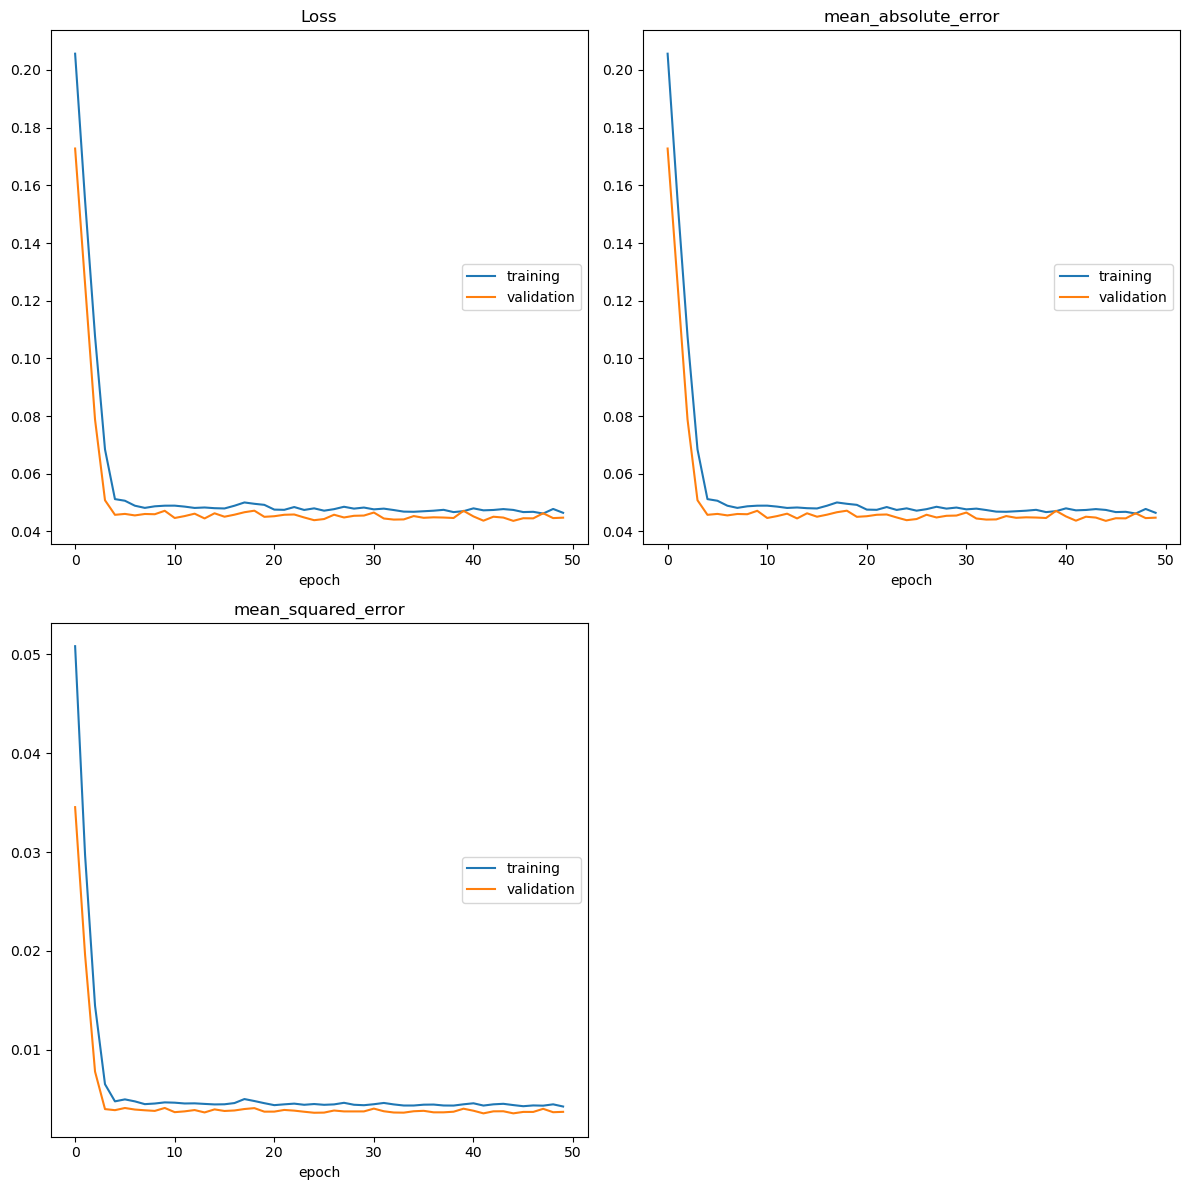

Loss
	training         	 (min:    0.046, max:    0.206, cur:    0.046)
	validation       	 (min:    0.044, max:    0.173, cur:    0.045)
mean_absolute_error
	training         	 (min:    0.046, max:    0.206, cur:    0.046)
	validation       	 (min:    0.044, max:    0.173, cur:    0.045)
mean_squared_error
	training         	 (min:    0.004, max:    0.051, cur:    0.004)
	validation       	 (min:    0.004, max:    0.035, cur:    0.004)
11/11 [==============================] - 0s 0s/step
Mejor resultado:
Optimizer: sgd, Epochs: 50
Resultados set de entrenamiento
MAE: 0.04743644220147814
MSE: 0.004419909488520179
Resultados set de test
MAE: 0.04460385107199351
MSE: 0.0036042404593231744
Función de activación: tanh


In [19]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from livelossplot import PlotLossesKeras

K.clear_session()

results_2 = {}

## Definición de la funcion de activacion
activations = ['relu', 'sigmoid', 'softmax', 'softplus', 'softsign', 'tanh']
# Definición de los optimizadores que se probarán
optimizers = ['sgd', 'rmsprop', 'adam']
# Definición del número de épocas que se probarán
num_epochs = [25, 50]

# Entrenamiento de modelos con diferentes combinaciones de funciones de activación, optimizadores y número de épocas
for activation in activations:
    for optimizer in optimizers:
        for num_epoch in num_epochs:
            # Creación del modelo fuera de los bucles anidados
            model = Sequential()
            # Modificación de las capas del modelo dentro del bucle
            model.add(Dense(256, activation=activation))
            # Salida de una neurona y sigmoide para que sea igual que nuestra variable respuesta
            model.add(Dense(output_var, input_shape=(dims,), activation="sigmoid"))

            # Definición de función de pérdida y métricas
            model.compile(optimizer=optimizer, loss='mean_absolute_error', 
                          metrics=["mean_squared_error", "mean_absolute_error"])

            # Entrenamiento de la red neuronal con el número de épocas definido
            history = model.fit(X_train, Y_train, 
                                verbose=1, 
                                epochs=num_epoch, 
                                validation_data=(X_test, Y_test),
                                callbacks=[PlotLossesKeras()]
                               )

            # Evaluación del modelo en el set de test
            predictions = model.predict(X_test).flatten()  # Convertir a vector 1D
            mae = np.mean(np.abs(predictions - Y_test))
            mse = np.mean(np.square(predictions - Y_test))

            # Evaluación del modelo en el set de entrenamiento
            predictions = model.predict(X_train).flatten()  # Convertir a vector 1D
            mae_tr = np.mean(np.abs(predictions - Y_train))
            mse_tr = np.mean(np.square(predictions - Y_train))
            
            # Almacenar los resultados en el diccionario
            result_key = f'Optimizer: {optimizer}, Epochs: {num_epoch}'
            results_2[result_key] = {'MAE': mae, 'MSE': mse, 'Activation': activation,'MAE_tr': mae_tr, 'MSE_tr': mse_tr}         

# Encontrar el mejor resultado basado en el menor valor de MAE
best_result_2 = min(results_2, key=lambda x: results_2[x]['MAE'])
best_result_params_2 = best_result_2.split(', ')
optimizer = best_result_params_2[0].split(': ')[1]
num_epochs = int(best_result_params_2[1].split(': ')[1])
best_activation = results_2[best_result_2]['Activation']

# Imprimir el mejor resultado y sus parámetros
print('Mejor resultado:')
print(best_result_2)

# Obtener los valores del mejor resultado
print('Resultados set de entrenamiento')
mae_2_tr = results_2[best_result_2]['MAE_tr']
mse_2_tr = results_2[best_result_2]['MSE_tr']
print('MAE:', mae_2_tr)
print('MSE:', mse_2_tr)

print('Resultados set de test')
mae_2 = results_2[best_result_2]['MAE']
mse_2 = results_2[best_result_2]['MSE']
print('MAE:', mae_2)
print('MSE:', mse_2)
print('Función de activación:', best_activation)


Se estima la mejor configuración de una red neuronal con dos capas. Se probaron diferentes combinaciones de optimizadores y número de épocas y la función de perdida optima del modelo anterior. Se entrenó el modelo con cada combinación y se evaluó su desempeño utilizando el MAE y MSE en un conjunto de prueba. Se seleccionó la configuración con el menor MAE como la mejor.

Los valores del mejor modelo encontrado son los siguientes:

- Funcion de activación para la capa 1: tanh
- Función de pérdida: mean_absolute_error
- Optimizador: sgd
- Número de épocas: 50

El desempeño del mejor modelo es el siguiente:

- MAE: 0.04439998742739358 
- MSE: 0.003689604616769392

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

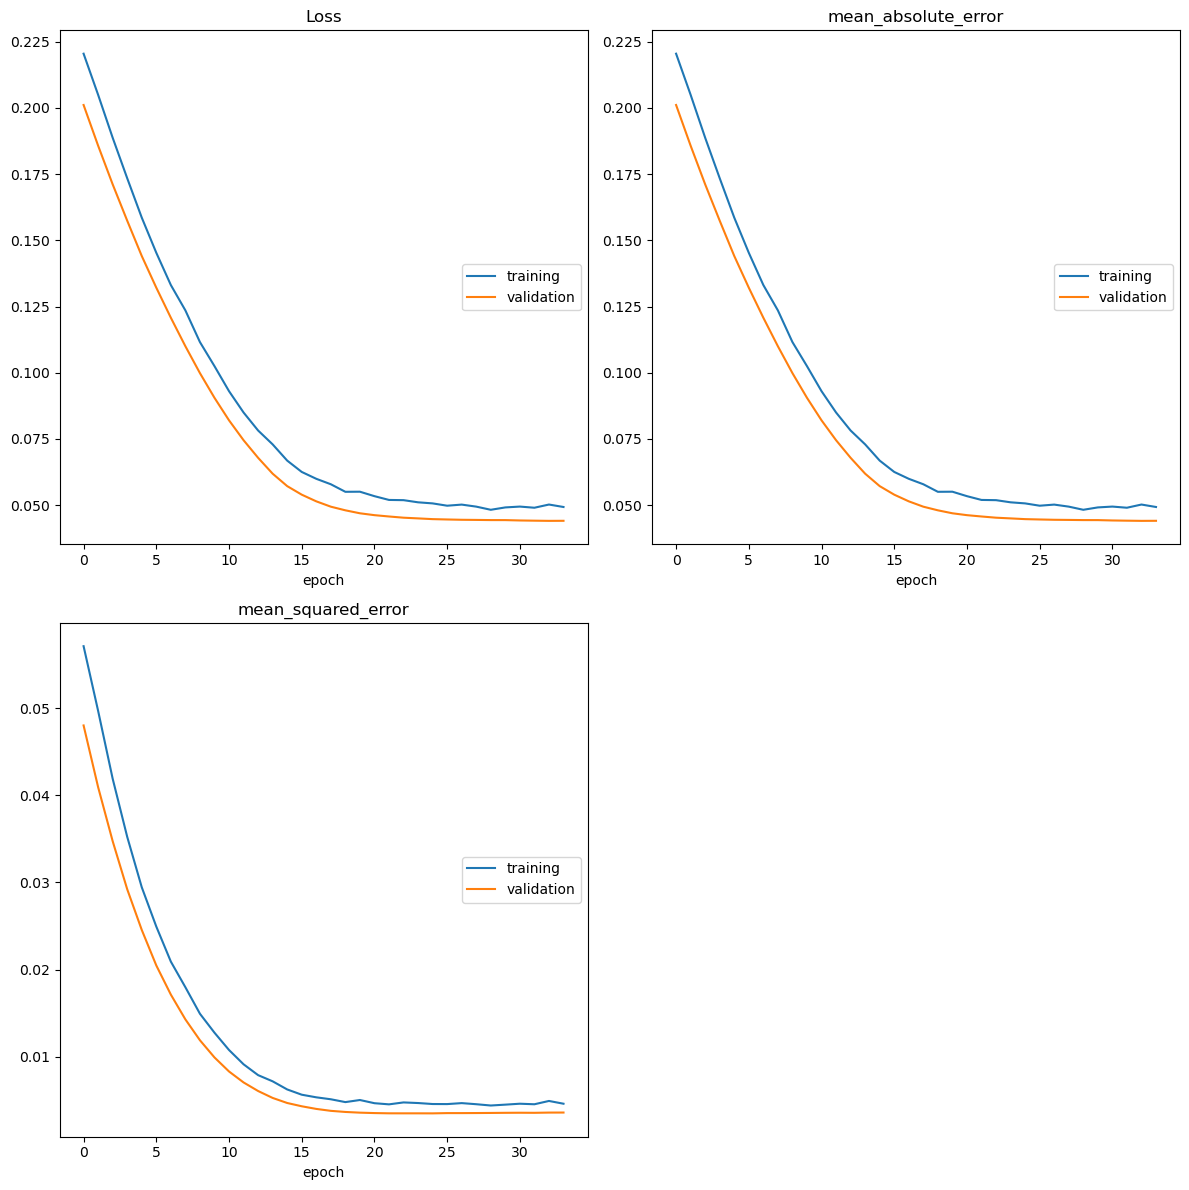

Loss
	training         	 (min:    0.048, max:    0.221, cur:    0.049)
	validation       	 (min:    0.044, max:    0.201, cur:    0.044)
mean_absolute_error
	training         	 (min:    0.048, max:    0.221, cur:    0.049)
	validation       	 (min:    0.044, max:    0.201, cur:    0.044)
mean_squared_error
	training         	 (min:    0.004, max:    0.057, cur:    0.005)
	validation       	 (min:    0.003, max:    0.048, cur:    0.004)
11/11 [==============================] - 1s 92ms/step - loss: 0.0493 - mean_squared_error: 0.0046 - mean_absolute_error: 0.0493 - val_loss: 0.0441 - val_mean_squared_error: 0.0036 - val_mean_absolute_error: 0.0441
Epoch 34: early stopping
5/5 [==============================] - 0s 880us/step
Resultados set de entrenamiento
MAE: 0.047609348743302485
MSE: 0.004386538595922248
Resultados set de test
MAE: 0.04406491854190827
MSE: 0.003582117091852109


In [20]:
# Celda 3
from keras.callbacks import EarlyStopping
from keras.layers import Dropout

best_activation = 'tanh'
loss = 'mean_absolute_error'
optimizer = 'sgd'
num_epochs = 50

model = Sequential()
model.add(Dropout(0.05))  # Agregamos dropout a una capa más grande para que surta efecto

model.add(Dense(256, activation=best_activation))  # Utilizamos la mejor función de activación para la capa oculta

model.add(Dense(output_var, input_shape=(dims,), activation="sigmoid"))  # Capa de salida con activación sigmoide

model.compile(
    optimizer=optimizer,  # Utilizamos el mejor optimizador encontrado anteriormente
    loss=loss,  # Utilizamos la mejor función de pérdida encontrada anteriormente
    metrics=["mean_squared_error", "mean_absolute_error"]
)

early_stop = EarlyStopping(monitor="loss", patience=5, verbose=1)

model.fit(
    X_train,
    Y_train,
    verbose=1,
    epochs=num_epochs,  # Utilizamos el número de épocas óptimo encontrado anteriormente
    validation_data=(X_test, Y_test),
    callbacks=[PlotLossesKeras(), early_stop]
)

# Evaluación del modelo en el set de entrenamiento
predictions = model.predict(X_train).flatten()  # Convertir a vector 1D
mae_3_tr = np.mean(np.abs(predictions - Y_train))
mse_3_tr = np.mean(np.square(predictions - Y_train))

# Evaluación del modelo en el set de test
predictions = model.predict(X_test).flatten()  # Convertir a vector 1D
mae_3 = np.mean(np.abs(predictions - Y_test))
mse_3 = np.mean(np.square(predictions - Y_test))

# Imprimir los resultados
print('Resultados set de entrenamiento')
print('MAE:', mae_3_tr)
print('MSE:', mse_3_tr)

# Imprimir los resultados
print('Resultados set de test')
print('MAE:', mae_3)
print('MSE:', mse_3)



Se configura una red neuronal utilizando la mejor función de activación, función de pérdida y optimizador encontrados previamente. Además, se aplican técnicas adicionales para mejorar el desempeño del modelo. Se utiliza el EarlyStopping para detener el entrenamiento prematuramente si no hay mejoras significativas en la función de pérdida. También se agrega una capa de Dropout para regularizar la red neuronal y evitar el sobreajuste.

Los valores del mejor modelo encontrado son los siguientes:

- Funcion de activación para la capa 1: tanh
- Función de pérdida: mean_absolute_error
- Optimizador: sgd
- Número de épocas: 38

El desempeño del mejor modelo es el siguiente:

- MAE: 0.0447071536620458 
- MSE: 0.003669002572443056

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

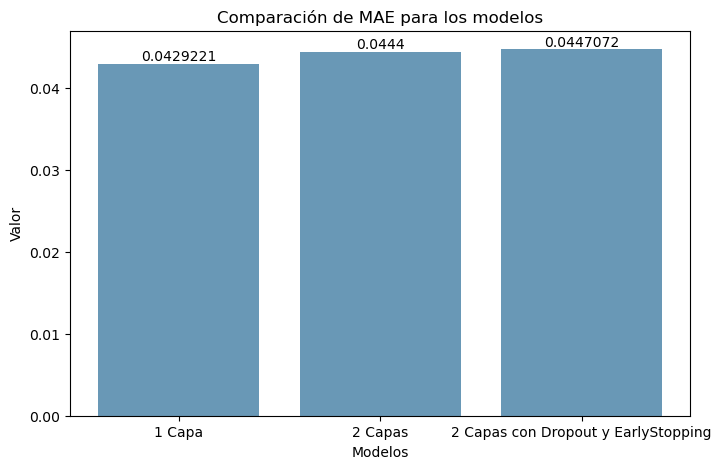

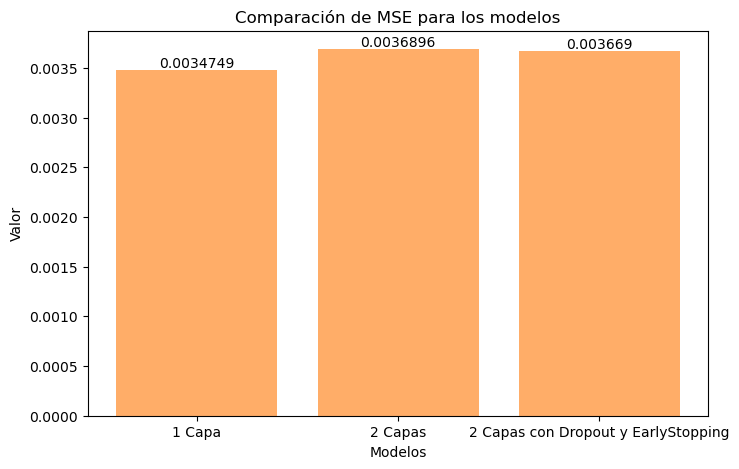

In [38]:
import matplotlib.pyplot as plt

Loss_1 = 'mean_absolute_error'
Optimizador_1 = 'sgd'
Epocas_1 = 25
MAE_1 = 0.042922060052553807 
MSE_1 = 0.0034748505540242594

# Funcion de activación para la capa 1: tanh
Loss_2 = 'mean_absolute_error'
Optimizador_2 = 'sgd'
Epocas_2 = 50
MAE_2 = 0.04439998742739358  
MSE_2 = 0.003689604616769392

# Funcion de activación para la capa 1: tanh
Loss_3 = 'mean_absolute_error'
Optimizador_3 = 'sgd'
Epocas_3 = 38
MAE_3 = 0.0447071536620458 
MSE_3 = 0.003669002572443056

# Etiquetas de los modelos
labels = ['1 Capa', '2 Capas', '2 Capas con Dropout y EarlyStopping']

# Redondear los valores de MAE y MSE a 2 decimales
mae_values = [round(MAE_1, 7), round(MAE_2, 7), round(MAE_3, 7)]
mse_values = [round(MSE_1, 7), round(MSE_2, 7), round(MSE_3, 7)]

# Gráfica para MAE
plt.figure(figsize=(8, 5))
plt.bar(labels, mae_values, color='#296d98', alpha=0.7)
plt.xlabel('Modelos')
plt.ylabel('Valor')
plt.title('Comparación de MAE para los modelos')

# Etiquetas de los valores de MAE
for i, mae in enumerate(mae_values):
    plt.text(i, mae, str(mae), ha='center', va='bottom', color='black')
    
# Mostrar la gráfica de MAE
plt.show()

# Gráfica para MSE
plt.figure(figsize=(8, 5))
plt.bar(labels, mse_values, color='#FF8B28', alpha=0.7)
plt.xlabel('Modelos')
plt.ylabel('Valor')
plt.title('Comparación de MSE para los modelos')

# Etiquetas de los valores de MSE
for i, mse in enumerate(mse_values):
    plt.text(i, mse, str(mse), ha='center', va='bottom', color='black')

# Mostrar la gráfica de MSE
plt.show()



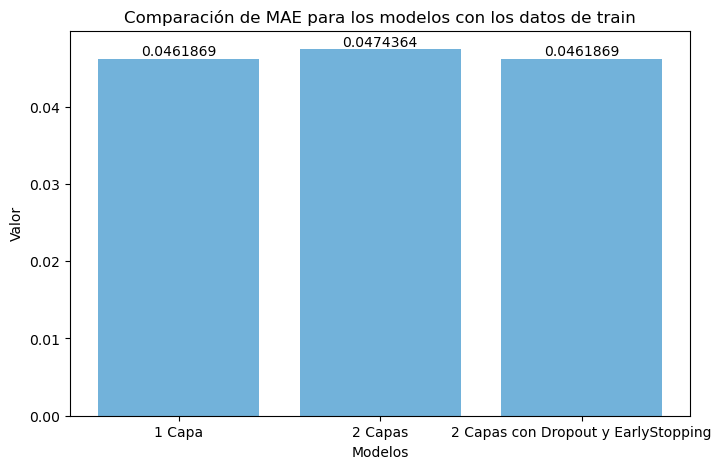

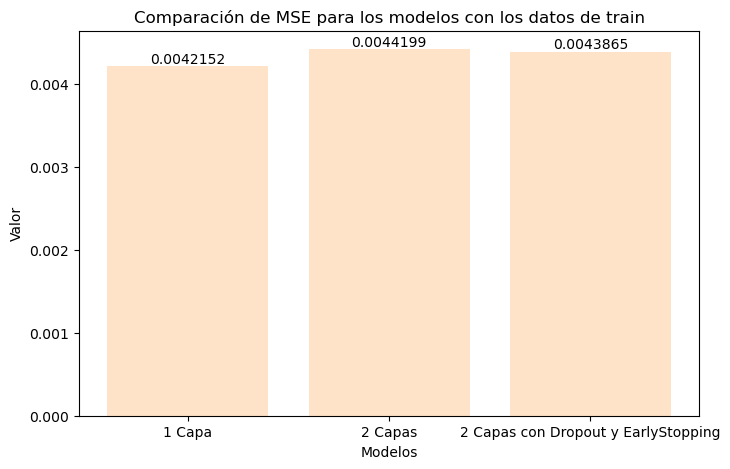

In [36]:
# Metricas con los datos de entrenamiento

# Etiquetas de los modelos
labels = ['1 Capa', '2 Capas', '2 Capas con Dropout y EarlyStopping']

# Redondear los valores de MAE y MSE a 2 decimales
mae_values_tr = [round(mae_1_tr, 7), round(mae_2_tr, 7), round(mae_1_tr, 7)]
mse_values_tr = [round(mse_1_tr, 7), round(mse_2_tr, 7), round(mse_3_tr, 7)]

# Gráfica para MAE
plt.figure(figsize=(8, 5))
plt.bar(labels, mae_values_tr, color='#3792cb', alpha=0.7)
plt.xlabel('Modelos')
plt.ylabel('Valor')
plt.title('Comparación de MAE para los modelos con los datos de train')

# Etiquetas de los valores de MAE
for i, mae in enumerate(mae_values_tr):
    plt.text(i, mae, str(mae), ha='center', va='bottom', color='black')
    
# Mostrar la gráfica de MAE
plt.show()

# Gráfica para MSE
plt.figure(figsize=(8, 5))
plt.bar(labels, mse_values_tr, color='#fed8b1', alpha=0.7)
plt.xlabel('Modelos')
plt.ylabel('Valor')
plt.title('Comparación de MSE para los modelos con los datos de train')

# Etiquetas de los valores de MSE
for i, mse in enumerate(mse_values_tr):
    plt.text(i, mse, str(mse), ha='center', va='bottom', color='black')

# Mostrar la gráfica de MSE
plt.show()


Al comparar el MAE y el MSE de los modelos con los datos de prueba, observamos que el modelo de 1 Capa tiene el menor valor de MAE y MSE, esto sugiere que dicho modelo tiene el mejor desempeño en la predicción de la probabilidad de admisión.

Al comparar la brecha entre los errores con la muestra de entrenamiento y la muestra de validación de cada modelo notamos que el modelo que presenta menor sobreajuste es el modelo de 1 Capa.

Desde el punto de vista de complejidad, El modelo 3 es el más complejo, seguido por el modelo 2 y el modelo 1. El modelo 3 es el más complejos ya que su red incluye más capas y un hipeparámetro adicional (Capa de Dropout para regularizar la red neuronal y evitar el sobreajuste; EarlyStopping para detener el entrenamiento prematuramente si no hay mejoras significativas en la función de pérdida)

Por otro lado al comparar el número de épocas de cada modelo, vemos que el modelo de 1 Capa tuvo un menor número de épocas (25) lo que nos indica que el modelo de 1 capa converge más rápido que los otros dos modelos.







